In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df =pd.read_csv(r'C:\Users\srith\Desktop\ScienceFair2022_2023\AnginaCleaned.csv')

In [3]:
df.shape

(225, 6)

In [4]:
median_lad=int(df[df['lad'].notnull()]['lad'].median())
median_rca=int(df[df['rca'].notnull()]['rca'].median())
median_cx=int(df[df['cx'].notnull()]['cx'].median())
median_score =int(df[df['score'].notnull()]['score'].median())
median_vol =int(df[df['volumemm3'].notnull()]['volumemm3'].median())

In [5]:
df['lad'].fillna(median_lad, inplace=True)
df['rca'].fillna(median_rca, inplace=True)
df['cx'].fillna(median_cx, inplace=True)
df['score'].fillna(median_score, inplace=True)
df['volumemm3'].fillna(median_vol, inplace=True)

In [6]:
driver_data = df

In [7]:
x_train, x_test = train_test_split(df, test_size = 0.1, random_state = 5)

In [8]:
train_label = x_train['score']
test_label = x_test['score']

In [9]:
x_train.drop(['score'], axis=1,inplace=True)
x_test.drop(['score'], axis=1,inplace=True)

In [10]:
model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, train_label)

#Predict the response for test dataset
pred = model.predict(x_test)

In [11]:
print("Accuracy:",(metrics.accuracy_score(test_label, pred)*100),"%")

Accuracy: 91.30434782608695 %


In [12]:
cf_matrix = confusion_matrix(test_label, pred)

In [13]:
cr = metrics.classification_report(test_label, pred, zero_division = 1, output_dict = True)
print(cr)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13}, '23': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '24': {'precision': 0.0, 'recall': 1.0, 'f1-score': 0.0, 'support': 0}, '35': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '61': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '83': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '89': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '366': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '385': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '590': {'precision': 0.0, 'recall': 1.0, 'f1-score': 0.0, 'support': 0}, '675': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '3053': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '3743': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'accuracy': 0.9130434782608695, 'macro avg': {'precisio

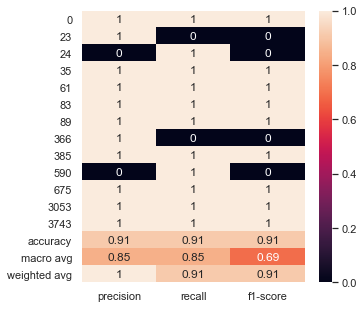

In [14]:
sn.set(rc={'figure.figsize':(5,5)})
sn.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.savefig('class_report.png', dpi=300, bbox_inches='tight')